# Case Study plotting

In [3]:
### Import packages
import polars as pl
import pandas as pd
import numpy as np
import scipy as sp

# For plotting
import seaborn as sns
sns.set_theme(style="ticks")
sns.axes_style("darkgrid")
sns.set_theme()

import sys
from os import getcwd
sys.path.append(getcwd())
import MultiStagePackage.OptMSPfunctions as msp
from MultiStagePackage.models import *

# For storing DataFrames
import pickle

models_numeric = [WT_aerob_growth,
                 WT_anaerob_growth, 
                 WT_anaerob_growth_arrest,
                 LC_aerob_growth,
                 LC_anaerob_growth, 
                 LC_anaerob_growth_arrest]

# initial conditions
X_0 = 0.1    # gDW/L
S_0 = 100.0  # mmol/L => max theoret c atoms for production = 6 atoms * S_0 (e.g.=100) = 600 c-atoms => 85% = 510
P_0 = 0.0    # mmol/L
s = np.array([X_0, S_0, P_0])

# Indexing
X, S, P = (i for i in range(len(s)))
r_S, r_P, mu = (i for i in range(3))

In the following only density=4 cases are observed:

In [4]:

stg1_ana_brf_all = msp.do_load('./Results/Computer_Stg1_ana_brf_All.pickle')

# Analytic brute force
stg2_ana_brf_all = msp.do_load('./Results/Computer_Stg2_ana_brf_All_den4.pickle')
stg2_ana_brf_1to3 = msp.do_load('./Results/Computer_Stg2_ana_brf_1to3_den4.pickle')
stg2_ana_brf_4to6 = msp.do_load('./Results/Computer_Stg2_ana_brf_4to6_den4.pickle')

stg3_ana_brf_all = msp.do_load('./Results/Computer_Stg3_ana_brf_All_den4.pickle')
stg3_ana_brf_1to3 = msp.do_load('./Results/Computer_Stg3_ana_brf_1to3_den4.pickle')
stg3_ana_brf_4to6 = msp.do_load('./Results/Computer_Stg3_ana_brf_4to6_den4.pickle')


# Numeric brute force
stg2_num_brf_all = msp.do_load('./Results/Computer_Stg2_ana_brf_All_den4.pickle')
stg2_num_brf_1to3 = msp.do_load('./Results/Computer_Stg2_ana_brf_1to3_den4.pickle')
stg2_num_brf_4to6 = msp.do_load('./Results/Computer_Stg2_ana_brf_4to6_den4.pickle')

stg3_num_brf_all = msp.do_load('./Results/Computer_Stg3_ana_brf_All_den4.pickle')
stg3_num_brf_1to3 = msp.do_load('./Results/Computer_Stg3_ana_brf_1to3_den4.pickle')
stg3_num_brf_4to6 = msp.do_load('./Results/Computer_Stg3_ana_brf_4to6_den4.pickle')

Check if numeric and analytic solutions match:

In [5]:
print(stg2_ana_brf_all.equals(stg2_num_brf_all))
print(stg2_ana_brf_1to3.equals(stg2_num_brf_1to3))
print(stg2_ana_brf_4to6.equals(stg2_num_brf_4to6))

print(stg3_ana_brf_all.equals(stg3_num_brf_all))
print(stg3_ana_brf_1to3.equals(stg3_num_brf_1to3))
print(stg3_ana_brf_4to6.equals(stg3_num_brf_4to6))

True
True
True
True
True
True


Get best results from dataframes:

In [6]:
dfs = [stg1_ana_brf_all,stg2_ana_brf_all,stg2_ana_brf_1to3,stg2_ana_brf_4to6,stg3_ana_brf_all,stg3_ana_brf_1to3,stg3_ana_brf_4to6]
best_res=pd.DataFrame(columns=list(stg1_ana_brf_all.columns))
for df in dfs:
    best_res=pd.concat([best_res,df.sort_values(["Vol_P"], ascending=[False]).dropna(axis=0).drop_duplicates(subset="Models", keep="first")[:1]]) 

display(best_res)   

,Index,Times,Models,End_T,End_X,End_S,End_P,finished,Vol_P,Y_SubInput,Y_SubUsed
1,2,"(0.0, 24.0)",[2],16.95,0.91,0.0,161.87,1,9.55,1.62,1.62
134,135,"(0.0, 4.5, 24.0)","[1, 5]",7.79,1.26,0.0,155.86,2,20.01,1.56,1.56
44,45,"(0.0, 4.5, 24.0)","[1, 2]",8.44,1.73,0.0,139.84,2,16.56,1.40,1.40
48,49,"(0.0, 4.75, 24.0)","[4, 5]",8.00,1.31,0.0,159.21,2,19.91,1.59,1.59
18410,18411,"(0.0, 2.75, 4.75, 24.0)","[1, 4, 5]",7.79,1.36,0.0,156.47,3,20.09,1.56,1.56
500,501,"(0.0, 2.5, 4.5, 24.0)","[1, 1, 2]",8.44,1.73,0.0,139.84,3,16.56,1.40,1.40
450,451,"(0.0, 1.0, 4.75, 24.0)","[4, 4, 5]",8.00,1.31,0.0,159.21,3,19.91,1.59,1.59


In [7]:
# Without 3 Stage 1to3 and 3 Stage 4to6
dfs = [stg1_ana_brf_all,stg2_ana_brf_all,stg2_ana_brf_1to3,stg2_ana_brf_4to6,stg3_ana_brf_all]
best_res=pd.DataFrame(columns=list(stg1_ana_brf_all.columns))
for df in dfs:
    best_res=pd.concat([best_res,df.sort_values(["Vol_P"], ascending=[False]).dropna(axis=0).drop_duplicates(subset="Models", keep="first")[:1]]) 

display(best_res)   

,Index,Times,Models,End_T,End_X,End_S,End_P,finished,Vol_P,Y_SubInput,Y_SubUsed
1,2,"(0.0, 24.0)",[2],16.95,0.91,0.0,161.87,1,9.55,1.62,1.62
134,135,"(0.0, 4.5, 24.0)","[1, 5]",7.79,1.26,0.0,155.86,2,20.01,1.56,1.56
44,45,"(0.0, 4.5, 24.0)","[1, 2]",8.44,1.73,0.0,139.84,2,16.56,1.40,1.40
48,49,"(0.0, 4.75, 24.0)","[4, 5]",8.00,1.31,0.0,159.21,2,19.91,1.59,1.59
18410,18411,"(0.0, 2.75, 4.75, 24.0)","[1, 4, 5]",7.79,1.36,0.0,156.47,3,20.09,1.56,1.56


Create summary plot (with adjusted customPlot() function):

In [20]:
import matplotlib.pyplot as plt

def customPlot(df, models_num, s, title, text, step=0.01):
   
    infos = msp.do_tuple_to_list(df)

    times  = infos[0]
    combis = infos[1]
    
    dat = pd.DataFrame()
    palette = sns.color_palette("muted",n_colors=len(combis)) # https://seaborn.pydata.org/tutorial/color_palettes.html
    fig, axs = plt.subplots(nrows=len(s), ncols=1, sharex=True, figsize=(5,len(s)*5))
    combi_list = []
    

    ## The loop for all the different modi
    for i in range(len(combis)):
        curr_combi= combis[i]
        curr_combi = [x-1 for x in curr_combi] # Prepare for correct indexing starting from 0
        curr_times = list(times[i])
        ## Simulate ODE
        finished=0
        s0=s
        results=pd.DataFrame()


        while len(curr_times)>1:
            finished= finished+1
            r = sp.integrate.solve_ivp(models_num[int(curr_combi[0])], t_span=[curr_times[0], curr_times[1]], y0=s0, t_eval=[curr_times[1]], events=[msp.event_sub0, msp.event_prod85percent], dense_output=True, max_step=step)
            t = np.linspace(curr_times[0], curr_times[1], (int(curr_times[1])+1)*20) # (times[1]+1)*20 = Resolution
            try:
                res = [r.y_events[0][0][X], r.y_events[0][0][S], r.y_events[0][0][P], r.t_events[0][0]]
            except:
                res = [r.y[X][0], r.y[S][0], r.y[P][0], r.t[0]]


            dat_add= pd.DataFrame(data={    'Time [h]'  : t, 
                                            'Biomass'   : r.sol(t)[0],
                                            'Substrate' : r.sol(t)[1],
                                            'Product'   : r.sol(t)[2]})
            results= pd.concat([results, dat_add])
            ## Drop the first element from combination and time
            # e.g.          (0,1,2) and (0.0, 2.0, 3.0, 24.0)
            # will become   (  1,2) and (     2.0, 3.0, 24.0)
            curr_combi.pop(0)
            curr_times.pop(0)
            s0=res[0:3]

        curr_times = [round(x,2) for x in list(times[i])]
        combi_str       = " ".join(str(x) for x in (combis[i],curr_times)) # For displaying in the plot

        results['Processes']=combi_str
        ## DataFrame
        

        dat= pd.concat([dat, results]) # res[1] = DataFrame with all Time, Biomass, Substrate and Product columns and times in rows
        combi_list.append(combi_str)

    print(results["Processes"])
    # Biomass plot
    sns.lineplot(
        data=dat,
        x="Time [h]", y="Biomass",
        hue="Processes", #col=columns,
        #kind="line",# size_order=["T1", "T2"], 
        palette=palette,
        #height=5, aspect=.75, facet_kws=dict(sharex=False), 
        linewidth=0.5,
        ax=axs[0],
        legend=True
    ).set(title=title, ylim=(0, dat["Biomass"].max()*1.05))
    plt.setp(axs[0].get_legend().get_texts(), fontsize='8')
    plt.setp(axs[0].get_legend().get_title(), fontsize='10')
    plt.setp(axs[0].set_ylabel('Biomass [gDW/L]'))

    
    # Substrate plot
    sns.lineplot(
        data=dat,
        x="Time [h]", y="Substrate",
        hue="Processes", #col="align",
        #kind="line",# size_order=["T1", "T2"], 
        palette=palette,
        #height=5, aspect=.75, facet_kws=dict(sharex=False), 
        linewidth=0.5,
        ax=axs[1],
        legend=True
    ).set(ylim=(0, int(s[S])))
    plt.setp(axs[1].get_legend().get_texts(), fontsize='8')
    plt.setp(axs[1].get_legend().get_title(), fontsize='10')
    plt.setp(axs[1].set_ylabel('Substrate [mmol/L]'))
    

    # Product plot
    sns.lineplot(data=dat, 
        x="Time [h]", y="Product", 
        hue="Processes", #col="align",
        #kind="line",# size_order=["T1", "T2"], 
        palette=palette,
        #height=5, aspect=.75, facet_kws=dict(sharex=False), 
        linewidth=0.5,
        ax=axs[2],
        legend=True
    ).set(ylim=(0, dat["Product"].max()*1.05))
    plt.setp(axs[2].get_legend().get_texts(), fontsize='8')
    plt.setp(axs[2].get_legend().get_title(), fontsize='10')
    plt.setp(axs[2].set_ylabel('Product [mmol/L]'))
    axs[2].axhline((s[S]*6)*0.85) # 85% theoretical product 
    

    # for i in range(len(s)):
    #     for line, name in zip(axs[i].lines, combi_list):
    #         y = line.get_ydata()[-1]
    #         x = line.get_xdata()[-1]
    #         if not np.isfinite(y):
    #             y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    #         if not np.isfinite(y) or not np.isfinite(x):
    #             continue     
    #         text = axs[i].annotate( name,
    #                                 xy=(x, y),
    #                                 xytext=(0, 0),
    #                                 color=line.get_color(),
    #                                 xycoords=(axs[i].get_xaxis_transform(),
    #                                 axs[i].get_yaxis_transform()),
    #                                 textcoords="offset points",
    #                                 fontsize=7)
    #         text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(axs[i].transData.inverted()).width)
    #         if np.isfinite(text_width):
    #             axs[i].set_xlim(axs[i].get_xlim()[0], text.xy[0] + text_width * 1.05)


0      [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
1      [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
2      [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
3      [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
4      [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
                     ...                
495    [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
496    [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
497    [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
498    [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
499    [1, 4, 5] [0.0, 2.75, 4.75, 24.0]
Name: Processes, Length: 660, dtype: object
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'mo

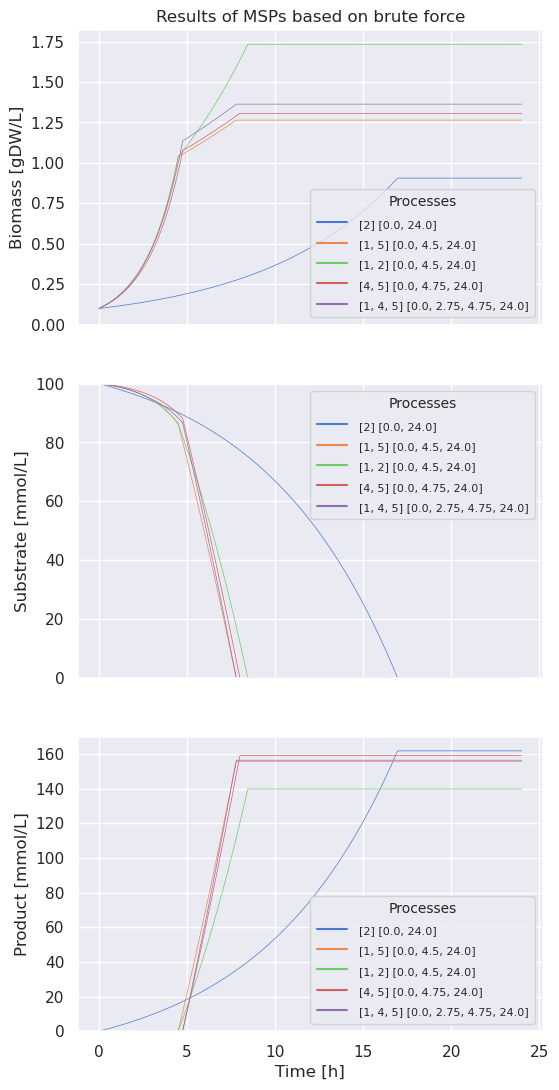

In [21]:
text=['1-Stg', '2*-Stg', '2-Stg 1to3', '2-Stg 4to6','3*-Stg']
customPlot(best_res, models_numeric, s, "Results of MSPs based on brute force", text)
#plt.rcParams['figure.figsize'] = 400, 12
figure = plt.gcf() # get current figure
figure.set_size_inches(6, 13)
plt.savefig('Results_brf.png', format='png')